# Implicit learning of visual ensembles during visual search in children with ASD

**Researchers: Sander Van de Cruys, Lisa Lemmens, Andrey Chetverikov, Laurie-Anne Sapey-Triomphe, Ilse Noens, Johan Wagemans**
___


See task,  procedure and participant description in the [Manuscript draft](https://docs.google.com/document/d/1N63YVUppCZ2AC4IBXmuS6sWog9-t3Xsq8YmCbZ6DMPo/edit?usp=sharing)


Notes:

* Warning: This is a working document, and may contain coding or reasoning errors...


<img src="img/task.jpg" style="height:800px">


### Explanation of variables:
    
- d_ori_xx = orientation of line number xx (goes from 0 to 35 where 0 is top left corner of a stimuli matrix and 35 is a bottom right corner; the stimuli matrix is filled by column, so item 0 has coordinates of [-8., -8.], item 1 has coordinates of [-8., -4.8.], item 5 - array([-8.,  8.]), and item 6 -  [-4.8, -8. ])
- set_size = number of lines in one set (always 36 here)
- stim_pos_x_30 = position of line number xx
- test_set_size = number of lines in test set (always 36)
- targetCol = column in which target is located
- dsd_test = distractors distribution SD of the test trials (always 5 here)
- seq_type = is it a prime trial or a test trial
- dsd = distractors distribution SD
- blockRepN = repetition of the different combinations of conditions (5 times here)
- targetDist - distance (in orientation) between targetOri and distrMean
- dtype_test = type of test distribution (always normal)
- prime_set_size = set size prime trials (always 36)
- correctResponse = what the correct response is
- dtype = distribution type (always normal)
- distrMean = mean of distractors orientation
- targetRow = row in which target is located
- dsd_prime = distractors distribution SD of prime trials
- streak_length_prime = number of trials in prime streaks (5 or 6)
- targetOri = target orientation 
- targetPos = position of target
- trialN = trial number within test or prime streak
- dtype_prime = distribution type in prime trials
- totBlockN = total number of streaks/blocks
- blockN = number of blocks per repetition of all conditions
- prevDistrCTPD = previous difference between target orientation and previous distractor mean
- prevDistrMean = previous distribution mean
- prevDistrType = previous distribution type
- answer = reponse (down or up)
- rt = reaction time
- correct = accuracy 
- trialScore
- session
- participant

Importing the required python libraries:

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # roughly ~base R plotting functionality
import pandas as pd #roughly ~base R & tidyr functionality 
import seaborn as sns #roughly ~ggplot2 functionality
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import ptitprince as pt # python version of rain cloud plots
import pingouin as pg # statistical tests
warnings.filterwarnings('ignore')

#to make the plots appear inline, and saved in notebook:
%matplotlib inline
sns.set_context("talk") # seaborn function to make plots according to purpose (talk, paper, poster, notebook)

# We'll show people what versions we use
import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)
import IPython
print(IPython.sys_info())
!pip freeze | grep -E 'seaborn|matplotlib|pandas|statsmodels|pingouin'

Ran on 2019-08-12T19:04:50.361666
{'commit_hash': '741169a00',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.7/dist-packages/IPython',
 'ipython_version': '7.7.0',
 'os_name': 'posix',
 'platform': 'Linux-5.0.0-23-generic-x86_64-with-Ubuntu-19.04-disco',
 'sys_executable': '/usr/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.7.3 (default, Apr  3 2019, 05:39:12) \n[GCC 8.3.0]'}
matplotlib==3.1.1
pandas==0.25.0
pingouin==0.2.8
seaborn==0.9.0
statsmodels==0.10.1


In [50]:
df = pd.read_csv('alldataDescr.csv', dtype = {'subjectId': str})

In [62]:
df.head()

,Unnamed: 0,expName,subjectId,group,session,blockN,totBlockN,trialN,targetOri,targetPos,...,SRS_SM,SRS_AP,IU,CBCL,SP,ADOS,ADOS_SA,ADOS_BRG,Group,FIQ
0,1,orientation_search,001,ASD,1,0,0,0,3.6,31,...,73.0,89.0,39.0,60.0,NaN,5.0,5.0,0.0,ASD,94.5
1,2,orientation_search,001,ASD,1,0,0,1,-35.4,21,...,73.0,89.0,39.0,60.0,NaN,5.0,5.0,0.0,ASD,94.5
2,3,orientation_search,001,ASD,1,0,0,2,16.6,25,...,73.0,89.0,39.0,60.0,NaN,5.0,5.0,0.0,ASD,94.5
3,4,orientation_search,001,ASD,1,0,0,3,-16.4,30,...,73.0,89.0,39.0,60.0,NaN,5.0,5.0,0.0,ASD,94.5
4,5,orientation_search,001,ASD,1,1,1,0,-48.1,34,...,73.0,89.0,39.0,60.0,NaN,5.0,5.0,0.0,ASD,94.5


In [56]:
print('Variables:\n', df.columns)
print('variables:\n', df.dtypes)
print('nb of participants:', len(df['subjectId'].unique()))
df.groupby('group')['subjectId'].nunique()

Variables:
 Index(['Unnamed: 0', 'expName', 'subjectId', 'group', 'session', 'blockN',
       'totBlockN', 'trialN', 'targetOri', 'targetPos', 'targetRow',
       'distrMean', 'dtype', 'dsd', 'targetDist', 'prevDistrMean',
       'streak_length_prime', 'seq_type', 'answer', 'rt', 'correct', 'd_ori_1',
       'd_ori_2', 'd_ori_3', 'd_ori_4', 'd_ori_5', 'd_ori_6', 'd_ori_7',
       'd_ori_8', 'd_ori_9', 'd_ori_10', 'd_ori_11', 'd_ori_12', 'd_ori_13',
       'd_ori_14', 'd_ori_15', 'd_ori_16', 'd_ori_17', 'd_ori_18', 'd_ori_19',
       'd_ori_20', 'd_ori_21', 'd_ori_22', 'd_ori_23', 'd_ori_24', 'd_ori_25',
       'd_ori_26', 'd_ori_27', 'd_ori_28', 'd_ori_29', 'd_ori_30', 'd_ori_31',
       'd_ori_32', 'd_ori_33', 'd_ori_34', 'd_ori_35', 'previous_correct',
       'previous_target', 'log_rt', 'ctpd', 'abs_ctpd', 'cdpt', 'abs_cdpt',
       'ctpt', 'abs_ctpt', 'cdpd', 'abs_cdpd', 'targetDist_ang', 'rt_z',
       'ctpd_z', 'ctpd_z2', 'cdpt_z', 'ctpt_z', 'ctpt_z2', 'cdpd_z',
       'abs_ctpd_

group
ASD    24
TD     25
Name: subjectId, dtype: int64

# Summarize data & compute inverse efficiency score (ies) to account for speed-accuracy trade off

In [66]:
dfsum = df.groupby(['subjectId', 'dsd', 'Group']).mean().reset_index()
dfsumrt = df.query('correct==1').groupby(['subjectId', 'dsd', 'Group']).mean().reset_index()
dfsum['ies']= dfsum.rt/dfsum.correct


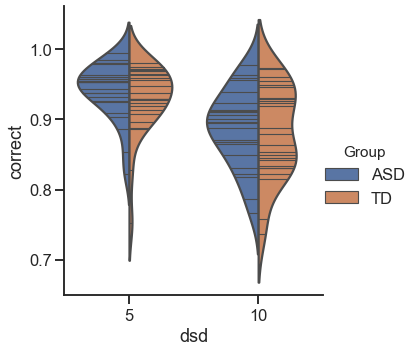

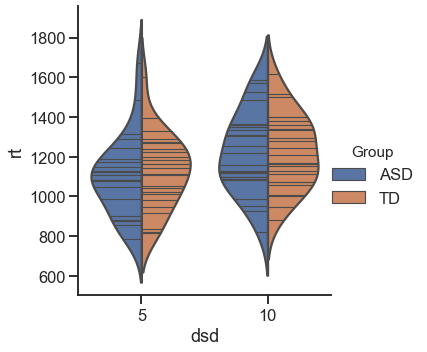

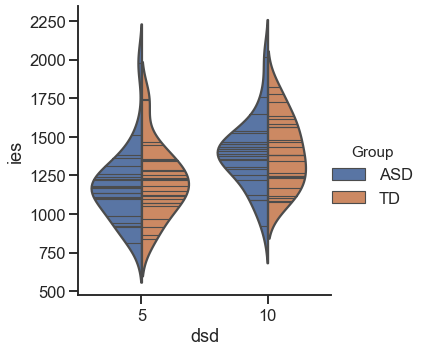

In [67]:
sns.catplot(x="dsd", y="correct", hue="Group",
            kind="violin", split=True,inner="stick", data=dfsum);

sns.catplot(x="dsd", y="rt", hue="Group",
            kind="violin", split=True,inner="stick", data=dfsumrt);

sns.catplot(x="dsd", y="ies", hue="Group",
            kind="violin", split=True,inner="stick", data=dfsum);


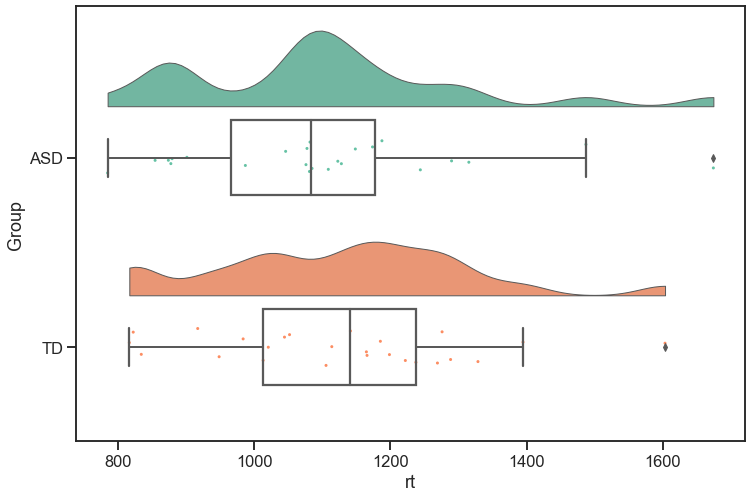

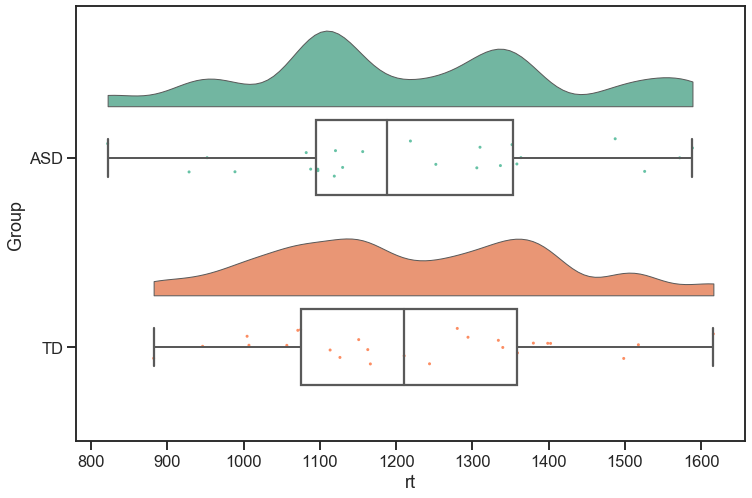

In [68]:
ax = pt.RainCloud(x = 'Group', y = 'rt', 
                  data = dfsumrt[dfsumrt.dsd==5], 
                  width_viol = .8,
                  width_box = .4,
                  figsize = (12, 8), orient = 'h',
                  move = .0)
ax = pt.RainCloud(x = 'Group', y = 'rt', 
                  data = dfsumrt[dfsumrt.dsd==10], 
                  width_viol = .8,
                  width_box = .4,
                  figsize = (12, 8), orient = 'h',
                  move = .0)

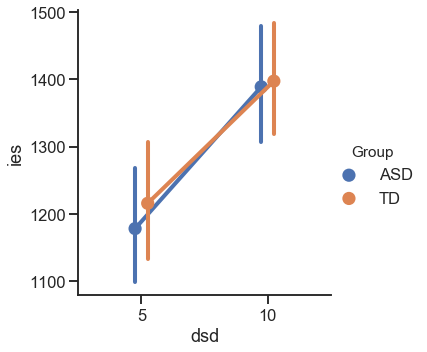

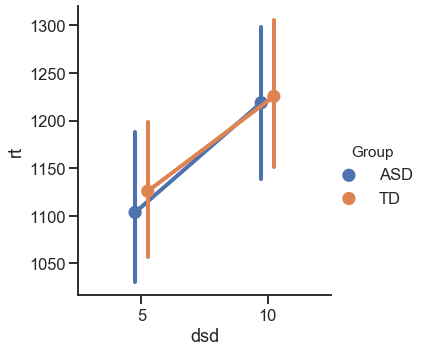

In [69]:
sns.catplot(x="dsd", y="ies", hue="Group", kind="point",dodge=.1, data=dfsum);
sns.catplot(x="dsd", y="rt", hue="Group", kind="point",dodge=.1, data=dfsumrt);

In [28]:
import rpy2.rinterface

%reload_ext rpy2.ipython

import warnings
warnings.filterwarnings('ignore')

In [29]:
%%R 

library(data.table)
library(reshape2)
library(lme4)
library(readxl)
library("ggpubr")
library(segmented)
library(tidyverse)
library(ggplot2)
library(BayesFactor)
library(lmerTest)
library(cowplot)




In [31]:
%%R

d_files_exp <- dir(path="Data/Exp/", pattern="*.csv", full.names = T)

read_data_exp<- function(x) {
  suppressMessages(df <- read_csv(x))
  df<- mutate_all(df, as.character)
  return(df)
}



df <- bind_rows(lapply(d_files_exp, read_data_exp))
#df <- bind_rows(lapply(d_files_exp, read_data_exp))

#Participants in ASD group have a participant number < 100 & participants in the TD group have a participant number > 200
df$group[df$participant < 100] <- "ASD" 
df$group[df$participant > 200] <- "TD"

df$group=factor(df$group)

In [32]:
%%R


df_select <- df %>%
  dplyr::select(.,expName,participant,group,session,blockN, totBlockN, trialN,targetOri,targetPos, targetRow,distrMean,dtype,dsd,targetDist,prevDistrMean,streak_length_prime, seq_type,answer,rt, correct, d_ori_1, d_ori_2,d_ori_3, d_ori_4, d_ori_5, d_ori_6, d_ori_7, d_ori_8, d_ori_9, d_ori_10, d_ori_11, d_ori_12, d_ori_13, d_ori_14, d_ori_15, d_ori_16, d_ori_17, d_ori_18, d_ori_19, d_ori_20, d_ori_21, d_ori_22, d_ori_23, d_ori_24, d_ori_25, d_ori_26, d_ori_27, d_ori_28, d_ori_29, d_ori_30, d_ori_31, d_ori_32, d_ori_33, d_ori_34, d_ori_35) %>%
  dplyr::rename(subjectId=participant) %>%
  mutate(blockN= as.numeric(blockN), totBlockN = as.numeric(totBlockN), trialN = as.numeric(trialN),dsd = as.numeric(dsd), targetOri = as.numeric(targetOri), targetPos = as.numeric(targetPos), targetRow= as.numeric(targetRow), distrMean=as.numeric(distrMean), targetDist = as.numeric(targetDist),prevDistrMean = as.numeric(prevDistrMean), streak_length_prime=as.numeric(streak_length_prime), rt=as.numeric(rt), correct=as.numeric(correct))%>%  
  filter(!is.na(rt))

#function to calculate difference between two angles (from Andrey)
angle_dist_180<-function(a,b){
  c = a - b
  (c+90)%%180 - 90
}

# Variables
df_filter <- df_select %>%
  mutate(rt=rt*1000)%>% #Convert to ms instead of sec
  mutate(previous_correct = lag(correct)) %>% #Previous trial correct?
  mutate(previous_target = lag(targetOri))%>% #Previous target orientation?
  mutate(.,log_rt = log(rt)) %>% 
  mutate(ctpd= angle_dist_180(targetOri,prevDistrMean))%>% #CT-PD: difference between current target ori and previous distractor ori mean. 
  mutate(abs_ctpd = abs(ctpd))%>% #absolute value of CT-PD
  mutate(cdpt= angle_dist_180(distrMean,previous_target))%>% #CD-PT: difference between current distractor ori mean and previous target ori.
  mutate(abs_cdpt = abs(cdpt))%>% #absolute value of CD-PT
  mutate(ctpt = angle_dist_180(targetOri,previous_target))%>% #CT-PT: difference between current target ori mean and previous target ori.
  mutate(abs_ctpt = abs(ctpt)) %>%# absolute value of CT-PT
  mutate(cdpd = angle_dist_180(distrMean,prevDistrMean))%>% #CD-PD: difference between current distractor ori mean and previous distractor ori    mean.
  mutate(abs_cdpd = abs(cdpd))%>%
  mutate(targetDist_ang = angle_dist_180(distrMean,targetOri))%>%
  mutate(distrMean = ifelse(distrMean> 90, distrMean - 180, distrMean))%>%#Convert them to orientations between -90° & + 90°
  mutate(distrMean = ifelse(distrMean< -90, distrMean + 180,distrMean))%>%
  mutate(distrMean = ifelse(distrMean> 90, distrMean - 180, distrMean))%>%
  mutate(distrMean = ifelse(distrMean> 90, distrMean - 180, distrMean))%>%
  mutate(targetOri = ifelse(targetOri > 90, targetOri - 180, targetOri))%>%
  mutate(targetOri = ifelse(targetOri < -90, targetOri + 180, targetOri))%>%
  mutate(targetOri = ifelse(targetOri > 90, targetOri - 180, targetOri))%>%
  mutate(targetOri = ifelse(targetOri > 90, targetOri - 180, targetOri))

In [33]:
%%R

df_filter <- df_filter %>% 
  group_by(subjectId) %>% 
  mutate(rt_z = scale(rt), 
         ctpd_z = scale(ctpd),
         ctpd_z2 = scale(ctpd^2), #Quadratic predictors
         cdpt_z = scale(cdpt),
         ctpt_z = scale(ctpt), 
         ctpt_z2 = scale(ctpt^2),
         cdpd_z=scale(cdpd),
         abs_ctpd_z = scale(abs_ctpd),
         abs_ctpt_z = scale(abs_ctpt),
         abs_cdpd_z=scale(abs_cdpd),
         targetDist_ang_z_2 = scale(targetDist_ang^2))

In [34]:
%%R

df_filter$subjectId=factor(df_filter$subjectId)
df_filter$session=factor(df_filter$session)
df_filter$dsd = factor(df_filter$dsd)

In [35]:
%%R

#Distribution of rts per participant with outliers
df_filter %>%
  filter(correct==1) %>%
  ggplot(., aes(subjectId,rt)) + geom_boxplot()

mean = mean(df_filter$rt)
sd = sd(df_filter$rt)
upper_limit = mean+ 3*sd

freq_with_outliers <- df_filter%>%group_by(subjectId,group)%>%summarise(n=n()) 
df_filter <- filter(df_filter,rt<upper_limit)
df_filter <- filter(df_filter,rt>100)
freq_without_outliers <- df_filter%>%group_by(subjectId,group)%>%summarise(n=n())
#Distribution of rts per participant without outliers
df_filter %>%
  filter(correct==1) %>%
  ggplot(., aes(subjectId,rt)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

#Percentage of trials lost per group?
trials_lost <- cbind(freq_with_outliers,freq_without_outliers)
trials_lost <-trials_lost %>% mutate(lost_trials = n-n1)
trials_lost %>% group_by(group) %>% summarise(tot_trials = sum(n), n1= sum(n1),tot_lost_trials = sum(lost_trials), perc = (tot_lost_trials/tot_trials)*100 )

# A tibble: 2 x 5
  group tot_trials    n1 tot_lost_trials  perc
  <fct>      <int> <int>           <int> <dbl>
1 ASD        21869 21644             225  1.03
2 TD         22412 22059             353  1.58


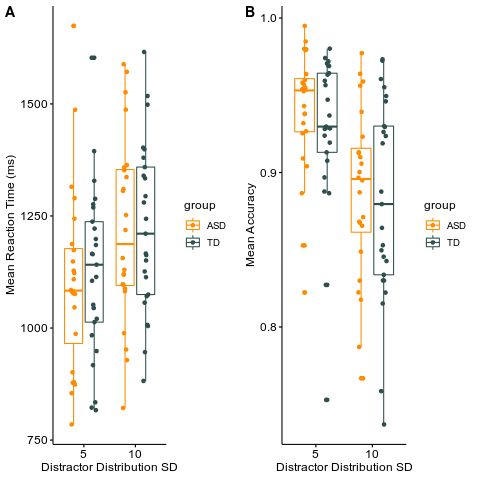

In [36]:
%%R

RTmeans_condition<- df_filter %>%
  filter(correct==1) %>% #only for correct responses
  group_by(subjectId,dtype,dsd,group) %>%
  summarise(mean_rt=mean(rt),sd_rt=sd(rt), mean_log_rt = mean(log_rt), sd_log_rt=sd(log_rt))

accmeans_condition<- df_filter %>%
  group_by(group,subjectId,dtype,dsd) %>%
  summarise(mean_acc=mean(correct),sd_acc=sd(correct))

means_condition <- RTmeans_condition%>%right_join(accmeans_condition, by=c("group","subjectId","dtype","dsd")) #RT and accuracy together

#summary table per group per condition
means_condition %>%
  group_by(group,dsd) %>%
  summarise(count = n(),acc=mean(mean_acc), sd_acc = sd(mean_acc), rt = mean(mean_rt), sd_rt=sd(mean_rt))

#Summary table per condition
means_condition %>%
  group_by(dsd) %>%
  summarise(count = n(),acc=mean(mean_acc), sd_acc = sd(mean_acc), rt = mean(mean_rt), sd_rt=sd(mean_rt))

#Plot RT data and acc data
plot_RT <- ggboxplot(means_condition, x = "dsd", y = "mean_rt", color = "group", add= "jitter", legend = "right", ylab="Mean Reaction Time (ms)", xlab = "Distractor Distribution SD" ) + scale_color_manual(values=c("darkorange", "darkslategrey"))+ scale_x_discrete( limits=c("5","10"))
#+ ggtitle("Mean Reaction Time per Group and per Condition") +theme(plot.title = element_text(hjust = 0.5))

plot_acc<- ggboxplot(means_condition, x = "dsd", y = "mean_acc", color = "group", add= "jitter", legend = "right", ylab="Mean Accuracy", xlab = "Distractor Distribution SD" )+ scale_color_manual(values=c("darkorange", "darkslategrey")) + scale_x_discrete( limits=c("5","10"))
# ggtitle("Mean Accuracy per Group and per Condition")+theme(plot.title = element_text(hjust = 0.5))
  
#Together in one figure with labels
plot_grid(plot_RT, plot_acc, labels = "AUTO")

In [22]:
%%R

##linear mixed model with DV = RT, IV within = dsd
lmer_rt<-lmer(log_rt ~ dsd * group + (dsd|subjectId), REML=F,  data = df_filter)
summary(lmer_rt)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: log_rt ~ dsd * group + (dsd | subjectId)
   Data: df_filter

     AIC      BIC   logLik deviance df.resid 
 53065.4  53134.8 -26524.7  53049.4    43695 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6377 -0.6900 -0.1394  0.6017  3.8754 

Random effects:
 Groups    Name        Variance Std.Dev. Corr 
 subjectId (Intercept) 0.023030 0.15176       
           dsd10       0.003967 0.06298  -0.17
 Residual              0.195776 0.44247       
Number of obs: 43703, groups:  subjectId, 49

Fixed effects:
              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)    6.91601    0.03164 48.80716 218.556  < 2e-16 ***
dsd10          0.07489    0.01478 48.43004   5.066 6.33e-06 ***
groupTD        0.01370    0.04432 48.89095   0.309    0.759    
dsd10:groupTD -0.01457    0.02075 48.84576  -0.702    0.486    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

In [46]:
%%R

bf_rt <- generalTestBF(log_rt ~ group * dsd + subjectId, data = as.data.frame(df_filter), 
                    whichRandom = "subjectId", neverExclude = "subjectId",whichModels = "withmain")
bf_df_rt <- as.data.frame(bf_rt)
bf_sorted_rt <- sort(bf_rt/ max(bf_rt))
bf_sorted_df_rt <- as.data.frame(bf_sorted_rt)
bf_sorted_df_rt$bfs <- (1/bf_sorted_df_rt$bf)
print(bf_sorted_df_rt)

                                              bf      error
group + subjectId                   2.241636e-37 0.02548726
subjectId                           1.913588e-36 0.02225065
group + dsd + group:dsd + subjectId 1.203881e-02 0.53899065
group + dsd + subjectId             1.171267e-01 0.02774064
dsd + subjectId                     1.000000e+00 0.00000000
                                                        time         code
group + subjectId                   Mon Aug 12 19:09:27 2019   19119811f4
subjectId                           Mon Aug 12 19:09:27 2019 191172988389
group + dsd + group:dsd + subjectId Mon Aug 12 19:09:27 2019 191168b154fd
group + dsd + subjectId             Mon Aug 12 19:09:27 2019 19111535212f
dsd + subjectId                     Mon Aug 12 19:09:27 2019 19116d5d6a2f
                                             bfs
group + subjectId                   4.461028e+36
subjectId                           5.225786e+35
group + dsd + group:dsd + subjectId 8.306467e+01


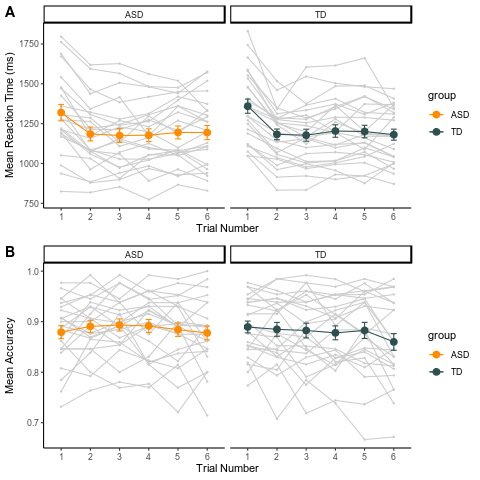

In [48]:
%%R

RT_trial <- df_filter %>%
  filter(correct==1) %>% #only correct responses
  filter(previous_correct == 1)  %>% #only when previous trial was correct (post-error slowdown)
  filter(dsd==10) %>% #prime trials
  group_by(subjectId, group, dsd,trialN) %>% 
  summarise(mean_rt=mean(rt),sd_rt=sd(rt), mean_log_rt=mean(log_rt), sd_log_rt = sd(log_rt))

#Plot RTs over trials within prime streaks
RT_repetition_plot<- ggplot(RT_trial,aes(x=as.factor(trialN),y=mean_rt, color = group)) +
geom_point(size=0.5, colour = "gray80") + #Individual data points 
geom_line(aes(group=subjectId), colour = "gray80") + #lines between individual data points
stat_summary(fun.y=base::mean, geom="point", size =3) + # points for means per group
stat_summary(fun.y=base::mean, geom="line",aes(group=group)) + #lines between points for means per group
stat_summary(fun.data = "mean_se", geom="errorbar", width = 0.2) + #Standard error errorbars
facet_grid(~group) +#Per group
xlab("Trial Number") + ylab("Mean Reaction Time (ms)") +    #axis titles
theme_classic() + 
scale_color_manual(values=c("darkorange", "darkslategrey")) + #colors
theme(plot.title = element_text(hjust = 0.5)) + # Center titles
scale_x_discrete(labels=c("0" = "1", "1" = "2", "2" = "3","3" = "4","4"= "5","5" = "6")) #Rename x-axis labels

#same for accuracy
acc_trial<- df_filter %>%
  filter(dsd== 10) %>%
  group_by(subjectId,group,trialN) %>%
  summarise(mean_acc=mean(correct),sd_acc=sd(correct))

acc_repetition_plot<-ggplot(acc_trial,aes(x=as.factor(trialN),y=mean_acc, color = group))+ geom_point(size=0.5, colour = "gray80")  + geom_line(aes(group=subjectId), colour = "gray80") + stat_summary(fun.y=base::mean, geom="point", size =3) + stat_summary(fun.y=base::mean, geom="line",aes(group=group)) + stat_summary(fun.data = "mean_se", geom="errorbar", width = 0.2) +  facet_grid(~group) +
  xlab("Trial Number") + ylab("Mean Accuracy")   + theme_classic() + scale_color_manual(values=c("darkorange", "darkslategrey"))+
  theme(plot.title = element_text(hjust = 0.5))+ scale_x_discrete(labels=c("0" = "1", "1" = "2",
                              "2" = "3","3" = "4","4"= "5","5" = "6"))

plot_grid(RT_repetition_plot, acc_repetition_plot, labels = "AUTO", align ='v', ncol=1)

# Interim conclusion: overall visual search performance

There seem to be no substantial differences, which is also what Lisa found in her mixed model and Bayesian tests for (log)rt: only a substantial effect for dsd (higher sd-> slower; more challenging). The literature on visual search in ASD find either faster search or no difference. But note that this concerns 'simpler' tasks that 

- Don't have the (manipulated) variability as we have here (dsd), distractors are more homogeneous in earlier studies, so simpler to disregard
- They often also don't have the odd-one-out character we have here, ie participants know what they have to search for.

So it is still interesting that ASD does not do worse here, they can deal with the variability (inferring the sameness in distractors to extract the deviant). Note that all the variability is relevant, in the sense that the more you can sample, the better the inference of what is same or different.

However, the data on the correlation with the social responsiveness scale (SRS; probing autism traits) casts a more nuanced picture. 

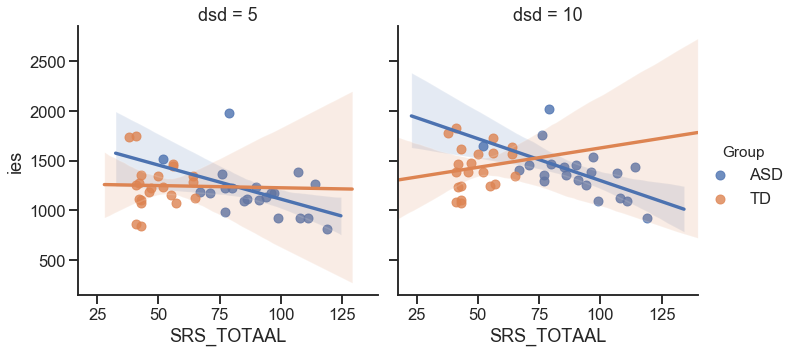

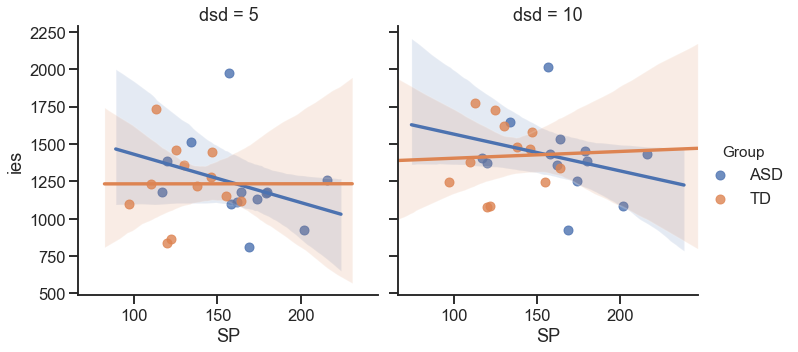

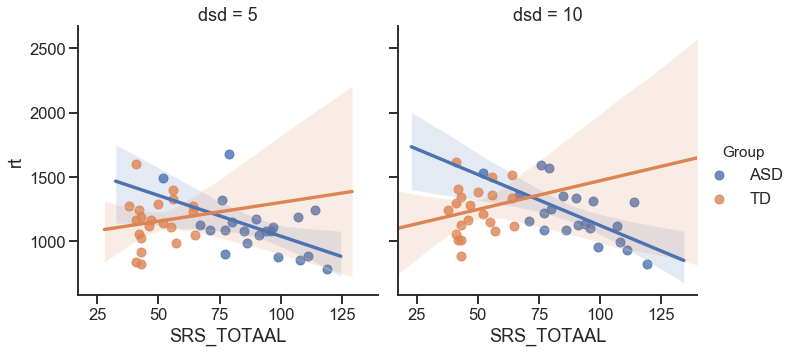

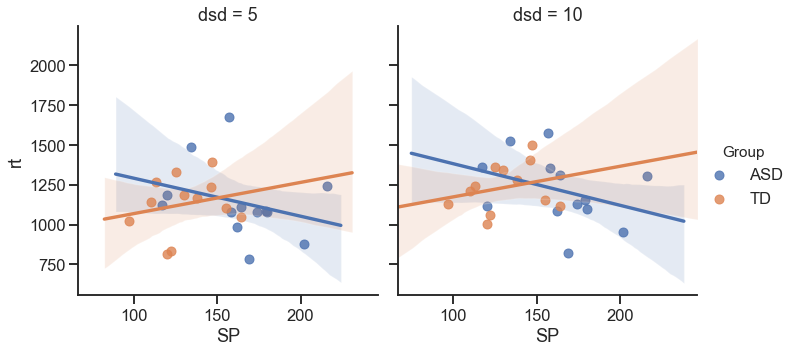

In [70]:
sns.lmplot(x="SRS_TOTAAL", y="ies", hue="Group",
           col="dsd", data=dfsum);
sns.lmplot(x="SP", y="ies", hue="Group",
           col="dsd", data=dfsum);
sns.lmplot(x="SRS_TOTAAL", y="rt", hue="Group",
           col="dsd", data=dfsumrt);
sns.lmplot(x="SP", y="rt", hue="Group",
           col="dsd", data=dfsumrt);

This suggests some of the improved/faster visual search (found in other studies) is present here as well, at least for those with high autism traits (SRS). Note that the variability in SRS in the TD group is smaller, which is to be expected (usual cutoff in 75). 

Adding this to the linear model indeed seems to make both group and SRS significant (in addition to dsd, and group*SRS). What's going on?


In [118]:
results = smf.ols('ies ~ dsd + dsd:Group + Group * SRS_TOTAAL', data=dfsum).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ies   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     6.289
Date:                 ma, 12 aug 2019   Prob (F-statistic):           5.94e-05
Time:                        17:32:53   Log-Likelihood:                -568.87
No. Observations:                  84   AIC:                             1150.
Df Residuals:                      78   BIC:                             1164.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1663

# A possible divisive normalization account of visual search?

There is a divisive normalization (DN) account of visual search possible, working as a kind of winner-take-all process ('max-pooling', see Carandini & Heeger). The response on an item is normalized by energy in neighbouring items/units/neurons, which boosts outliers. See figure from Whitney, Haberman, Sweeney, 2014:

<img src="img/whitney2014.png" style="height:800px">

Intact performance may then be evidence for normal (non-reduced; contra Rosenberg et al) DN in ASD. It's interesting to speculate what the improved visual search in simple tasks in ASD means in that case. Does this mean that people with ASD only have a benefit if the 'contrast' can be computed very locally, ie if pooling across a larger region is necessary they are not better. 

What does this mean in DN terms? Do they have a stronger suppression 'weight' (kappa) but a smaller suppressive pool (g(i))? They perform the task on a more local level, but accentuate local differences stronger? And do they then cancel each other in the current task?

$\overline{{r}_{i}}={r}_{0}+{r}_{max}\frac{{[c\ast {f}_{i}(s)]}^{2}}{{c}_{50}^{2}+\kappa {[c\ast {g}_{i}(s)]}^{2}}$

(I had the idea of the increased weight from our study on orientation suppression and DN, where, if anything, there was more tilt illusion in some individuals with ASD. Because of the psychophysics involved, there were only 10 subjects in each group so we couldn't really examine this more.)

If so, can we see a signature of this in our visual search data? If we assume higher weighting => shorter search times, but pooling problems => longer search times.

- More accuracy for the shorter RTs in ASD (where the focus coincidentally lands on the target neighbourhood)? Especially in low dsd condition. When RTs are longer (overall, average RT was >1000ms, so most trials probably multiple saccades), worse accuracy?
- For shorter RTs, faster response in ASD than in TD? (without the need for large pooling, better search) For longer RTs, reversal of the difference? (with the need for pooling, slower, more serial?)

To be addressed in the distributional analyses below...

# What about predictive coding?
Note that there are interesting parallels between DN and precision(inverse variance)-weighting in predictive coding (PC) and some argue DN can function as one of the neural implementations of precision-weighting. See Lawson et al 2015: 
>"precision functions as a form of divisive normalization— where variance measured across a broad pool of perceptual regions and timescales acts as a denominator in a divisive computation—to scale or contextualize the driving neural responses to sensory input (not unlike dividing a difference in group means by its SE to form a t-statistic)."

The (precision) weight would then be determined by:
- The spatial (and temporal) scale on which activity is pooled (note that a smaller scale would make the estimate more unreliable due to noise)
- Weight (kappa above) given to this suppressive pool 
Both may be different across individuals, and some studies (e.g., Coen-Cagli et al., 2015) suggest they likely even vary within individuals, depending on context. Such flexible or adaptive weighting is evidently relevant in the context of HIPPEA (that posits a combi of less flexible and higher weights in ASD). The Nature Neuroscience study by Coen-Cagli et al. 
>"shows that it makes little sense for the context (neurons) to indiscriminately modulate a given neuron’s activity, when the extent to which context and (classical) receptive field are part of the same inferred cause (homogenous surface) varies in natural images. Hence, they argue that the strength of the suppression should be tuned flexibly based on a (Bayesian) inference on whether target and surround are actually homogeneous. This generalized, flexible DN model is shown to better fit the activity of V1 neurons than a conventional DN model, when applied to natural images. The inference on whether target and surround activity are caused by a common hidden cause in the input, makes the connection explicit with Bayesian accounts of perception, as well as with perceptual grouping or segmentation ...[]...inference on whether inputs derive from a common, homogeneous cause in space (a perceptual object) or in time (stationarity vs
volatility) are important on all levels of the hierarchy, not just in V1. This acknowledgement links the type of flexible gain control discussed here to the flexible gain regulation thought to be deficient in ASD according to recent predictive processing accounts of the disorder (2,44). In those models, the weight (or “precision”) of prediction errors needs to be lowered when it is inferred that those prediction errors derive from mere noise (so still the same hidden cause) or while the gain should be increased when they derive from an actual change in the environment (a different hidden cause)." (Van de Cruys et al. 2018)

The inference of homogeneity (of center and surround) may come from higher levels, parallelling the idea that (some of the) computations necessary for precision tuning come from higher cortical levels.

>"Optimal inference relies on combining the likelihood of the evidence (how likely  the  pattern  of  filters  outputs  arose  from  a  homogenous  or heterogeneous image) with prior knowledge about how often natural  images are homogeneous, according to Bayes’ rule" (Coen-Cagli et al. 2015). 

Evidently, the inference of homogeneity is very relevant for our visual search task as well. Such higher level must get inputs from multiple units, and that expected homogeneity estimates (what counts as homogeneous) are tuned across displays. Hence, faster reaction times with subsequent trials that have the same distractor distribution. If so this might also need more time, so create higher reaction times.

That said there are differences in computational setting of DN and precision-weighting (which Friston's group hasn't addressed):
- Some would say the suppression pool in DN is a form of prior (originating within a visual level, as in Rao & Ballard), a 'prediction' that removes redundancy (information already present in the surround). In that case the divisive suppression in DN stands in contrast to the subtractive suppression in PC (ie prediction minus sensory input)
- Also, PC talks about representing sufficient statistics (mean and variance, predicted state and precision), while DN is formulated within a population coding framework. Don't know whether these are easily reconciled.


# Response Time Distributional Analyses

Some of the text and code below is copied from [Erik Marsja](https://www.marsja.se/response-time-distributions-using-python/)

Balota, D. a., & Yap, M. J. (2011). Moving Beyond the Mean in Studies of Mental Chronometry: The Power of Response Time Distributional Analyses. Current Directions in Psychological Science, 20(3), 160–166. http://doi.org/10.1177/0963721411408885

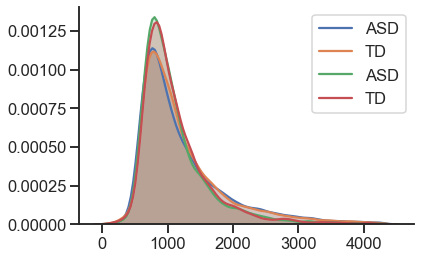

In [119]:
fig, ax = plt.subplots()
groups = ['ASD', 'TD']

for group in groups:
    condition_data = df[(df['Group'] == group) & (df['correct']==1) & (df.dsd==10)]['rt']
    sns.kdeplot(condition_data, shade=True, label=group)
    
sns.despine()

for group in groups:
    condition_data = df[(df['Group'] == group) & (df['correct']==1) & (df.dsd==5)]['rt']
    sns.kdeplot(condition_data, shade=True, label=group)
    
sns.despine()

# Cumulative distribution function of rts

In [120]:
def cdf(df, conditions=['congruent', 'incongruent']):

    data = {i: df[(df.dsd == conditions[i])] for i in range(len(
        conditions))}
    plot_data = []

    for i, condition in enumerate(conditions):

        rt = data[i].rt.sort_values()
        yvals = np.arange(len(rt)) / float(len(rt))

        # Append it to the data
        cond = [condition]*len(yvals)

        df = pd.DataFrame(dict(dens=yvals, dv=rt, condition=cond))
        plot_data.append(df)

    plot_data = pd.concat(plot_data, axis=0)

    return plot_data

In [121]:
def cdf_plot(cdf_data, save_file=False, legend=True):
    sns.set_style('white')
    sns.set_style('ticks')
    g = sns.FacetGrid(cdf_data, hue="condition", size=8)
    g.map(plt.plot, "dv", "dens", alpha=.7, linewidth=1)
    if legend:
        g.add_legend(title="dsd")
    g.set_axis_labels("Response Time (ms.)", "Probability")
    g.fig.suptitle('Cumulative density functions')

    if save_file:
        g.savefig("cumulative_density_functions_seaborn_python_response"
                  "-time.png")

    plt.show()

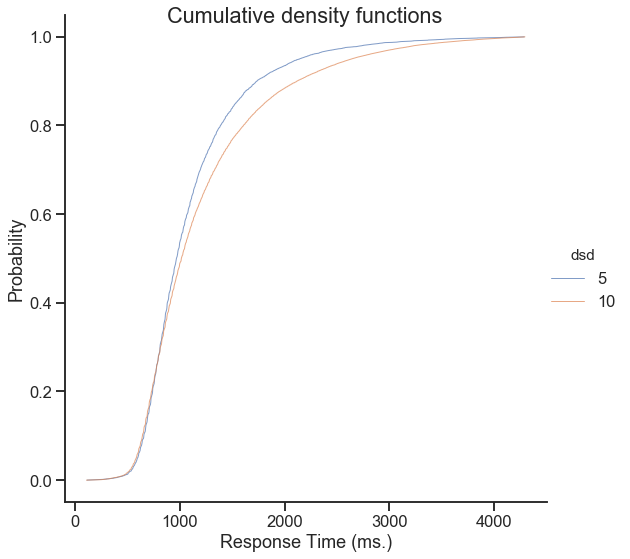

In [122]:
cdf_dat = cdf(df[df.correct==1], conditions=[5,10])
cdf_plot(cdf_dat, legend=True, save_file=False)

# Conditional Accuracy Functions

Conditional accuracy functions (CAF) is a technique that also incorporates the accuracy in the task. Creating CAFs involve binning your data (e.g., the response time and accuracy) and creating a linegraph. Briefly, CAFs can capture patterns related to speed/accuracy trade-offs (see Richard, 2014).

Richard, P. (2014). The speed-accuracy tradeoff : history , physiology , methodology , and behavior. Frontiers in Neuroscience, 8(June), 1–19. http://doi.org/10.3389/fnins.2014.00150

In [123]:
def calc_caf(df, subid, rt, acc, condition, quantiles=[0.25, 0.50, 0.75, 1]):
    """
    Calculates conditional accuracy functions (CAF) per subject and agregates into 
    one CAF. 
    
    Parameters
    ----------
    df : pandas dataframe
        A subset containing the data from one of the conditions
    subid : string
        Contains the colum name with the subject identifier
    rt : string 
        column name for column containing the response/reaction times
    acc : string  
        column name for column containing the accuracy data
    condition :string 
        column name for column containing the conditions identfiers
    quantiles: list 
        contains the quantiles (e.g., [0.25, 0.50, 0.75, 1])

    Returns
    -------
        a multi-indexed pandas data frame

    Examples:
     incongr = frame[(frame.TrialType == 'incongruent)]
     incongr_caf = calc_caf(incongr, "SubID", "RT", "ACC", "incongruent")
    """

    # Subjects
    subjects = pd.Series(df[subid].values.ravel()).unique().tolist()
    subjects.sort()

    # Multi-index frame for data:
    arrays = [np.array(['rt'] * len(quantiles) + ['acc'] * len(quantiles)),
              np.array(quantiles * 2)]

    data_caf = pd.DataFrame(columns=subjects, index=arrays)

    # Calculate CAF for each subject
    for subject in subjects:

        sub_data = df.loc[(df[subid] == subject)]

        subject_cdf = sub_data[rt].quantile(q=quantiles).values

        # calculate mean response time and proportion of error for each bin
        for i, q in enumerate(subject_cdf):

            quantile = quantiles[i]

            # First quantile
            if i < 1:
                # Subset
                temp_df = sub_data[(sub_data[rt] < subject_cdf[i])]
                # RT
                data_caf.loc[('rt', quantile)][subject] = temp_df[rt].mean()
                # Accuracy
                data_caf.loc[('acc', quantile)][subject] = temp_df[acc].mean()

            # Second  & third quantile
            elif i == 1 or i < len(quantiles):

                # Subset
                temp_df = sub_data[(sub_data[rt] > subject_cdf[i - 1]) & (
                    sub_data[rt] < q)]
                # RT
                data_caf.loc[('rt', quantile)][subject] = temp_df[rt].mean()

                # Accuracy
                data_caf.loc[('acc', quantile)][subject] = temp_df[acc].mean()

            # Last quantile MAY WANT TO CHANGE THIS
            elif i == len(quantiles):
                # Subset
                temp_df = sub_data[(sub_data[rt] > subject_cdf[i])]

                # RT
                data_caf.loc[('rt', quantile)][subject] = temp_df[rt].mean()

                # Accuracy
                data_caf.loc[('acc', quantile)][subject] = temp_df[acc].mean()

    # Aggregate subjects CAFs
    data_caf = data_caf.mean(axis=1).unstack(level=0)

    # Add trialtype
    data_caf['trialtype'] = [condition for _ in range(len(quantiles))]

    return data_caf


def caf_plot(df, save_file=False, im_size=6):
    """
    Plotting the conditional accuracy functions (CAF)
    
    Parameters
    ----------
    df : pandas dataframe 
        containing the CAF(s) calculated with calc_caf
    save_file : boolean
        True if planning to save file
    im_size : integer
        Size of the image (i.e., the plot)
        
    Examples
    --------
    incongr = frame[(frame.TrialType == 'incongruent)]
    incongr_caf = calc_caf(incongr, "SubID", "RT", "ACC", "incongruent")
    caf_plot(incongr_caf)
    """
    sns.set_style('white')
    sns.set_style('ticks')

    g = sns.FacetGrid(df, hue="trialtype", size=im_size, ylim=(0, 1.1))
    g.map(plt.scatter, "rt", "acc", s=50, alpha=.7, linewidth=1,
          edgecolor="white")
    g.map(plt.plot, "rt", "acc", alpha=.7, linewidth=1)
    g.add_legend(title="Group")
    g.set_axis_labels("Response Time (ms.)", "Accuracy")
    g.fig.suptitle('Conditional Accuracy Functions')

    if save_file:
        g.savefig("conditional_accuracy_function_seaborn_python_response"
                   "-time.png")

    plt.show()




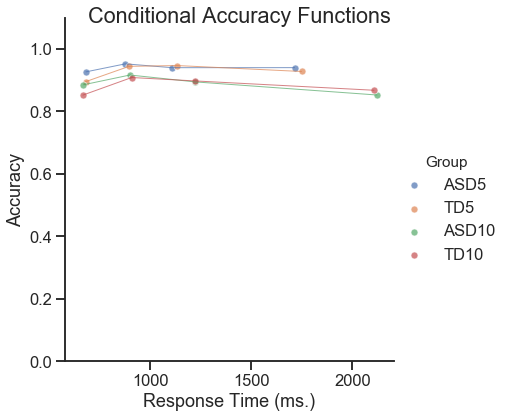

In [124]:
# Conditional accuracy function (data) for incongruent and congruent conditions
ASD5 = calc_caf(df[(df.Group == "ASD") & (df.dsd == 5)], "subjectId", "rt", "correct",
               "ASD5")
TD5 = calc_caf(df[(df.Group == "TD") & (df.dsd == 5)], "subjectId", "rt", "correct",
               "TD5")
ASD10 = calc_caf(df[(df.Group == "ASD") & (df.dsd == 10)], "subjectId", "rt", "correct",
               "ASD10")
TD10 = calc_caf(df[(df.Group == "TD") & (df.dsd == 10)], "subjectId", "rt", "correct",
               "TD10")


#Combine the data and plot it
df_caf = pd.concat([ASD5, TD5, ASD10, TD10])

caf_plot(df_caf, save_file=True)

# Delta plots

Delta plots (DPs) can be used to visualize and compare response time quantiles obtained under two experimental conditions. DPs enable examination whether the experimental manipulation has a larger effect on the relatively fast responses or on the relatively slow ones (e.g., Speckman, Rouder, Morey, & Pratte, 2008).

Speckman, P. L., Rouder, J. N., Morey, R. D., & Pratte, M. S. (2008). Delta Plots and Coherent Distribution Ordering. The American Statistician, 62(3), 262–266. http://doi.org/10.1198/000313008X333493

In [125]:
def calc_delta_data(df, subid, rt, condition, conditions=['incongruent',
                                                   'congruent']):
    """
    Calculating the data for creating delta plots. That is, binning
    the response time and accuracy data in deciles. First each subjects
    data is binned. Then the binned data is avaraged.
    
    Parameters
    ----------
    df : pandas dataframe
        Data to bin.
    subid : string
        Column name for column with the subject identfier
    rt : string
        Column name for column with the response times
    condition : string
        Column name for column with the conditions
    conditions : list
        Containing string of the conditions in the experiment
        
    Returns
    -------
    delta_data: Dataframe
        Binned avarage response time and response time diff b/w conditions 
        
    Examples
    --------
    d = calc_delta_data(frame, "SubID", "RT", "TrialType", ['incongruent',
                                                       'congruent'])
    
    """


    subjects = pd.Series(df[subid].values.ravel()).unique().tolist()
    subjects.sort()

    deciles = np.arange(0.1, 1., 0.1)

    cond_one = conditions[0]
    cond_two = conditions[1]

    # Frame to store the data (per subject)
    arrays = [np.array([cond_one, cond_two]).repeat(len(deciles)),
              np.array(deciles).tolist() * 2]
    data_delta = pd.DataFrame(columns=subjects, index=arrays)

    for subject in subjects:

        sub_data_inc = df.loc[(df[subid] == subject) & (df[condition] ==
                                                        cond_one)]
        sub_data_con = df.loc[(df[subid] == subject) & (df[condition] ==
                                                        cond_two)]

        inc_q = sub_data_inc[rt].quantile(q=deciles).values
        con_q = sub_data_con[rt].quantile(q=deciles).values
        for i, dec in enumerate(deciles):
            data_delta.loc[(cond_one, dec)][subject] = inc_q[i]
            data_delta.loc[(cond_two, dec)][subject] = con_q[i]


    # Aggregate deciles
    data_delta = data_delta.mean(axis=1).unstack(level=0)
    # Calculate difference
    data_delta['Diff'] = data_delta[cond_one] - data_delta[cond_two]
    # Calculate average
    data_delta['Average'] = (data_delta[cond_one] + data_delta[cond_two]) / 2

    return data_delta


def delta_plot(delta_data, group=None, save_file=False, im_size=6):
    """
    Delta plot
    
    Parameters
    ----------
    delta_data : pandas dataframe
        Binned avarage response time and response time diff b/w conditions 
    save_file : boolean
        True if file (.png) of plot is going to be saved
    im_size : integer
        Size of the image (i.e., the plot)
        
    Examples
    -------
    d = calc_delta_data(frame, "SubID", "RT", "TrialType", ['incongruent',
                                                       'congruent'])
    delta_plot(d, save_file=True)
    """

    ymax = delta_data['Diff'].max() + 10
    ymin = delta_data['Diff'].min() - 10
    xmin = delta_data['Average'].min() - 20
    xmax = delta_data['Average'].max() + 20

    g = sns.FacetGrid(delta_data, hue=group, ylim=(ymin, ymax), xlim=(xmin, xmax),
                      size=im_size)
    g.map(plt.scatter, "Average", "Diff", s=50, alpha=.7, linewidth=1,
          edgecolor="white")
    g.map(plt.plot, "Average", "Diff", alpha=.7, linewidth=1)
    ax = g.axes[0]
    ax[0].axhline(0, ls='--', color='black')
    g.set_axis_labels("Average RTs (ms.)", "Effect (ms.)")
    if group: g.add_legend(title=group)
    g.fig.suptitle('Delta Plot')
    if save_file:
        g.savefig("delta_plot_seaborn_python_response-time.png")
    

Usually applied on within-subject variable, but also applicable here?

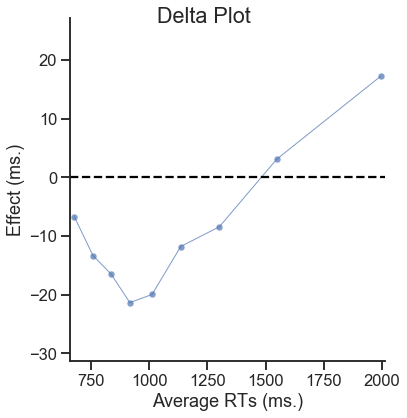

In [126]:
d_data = calc_delta_data(df[(df.correct==1)], "subjectId", "rt", "Group", ['ASD','TD'])
delta_plot(d_data)

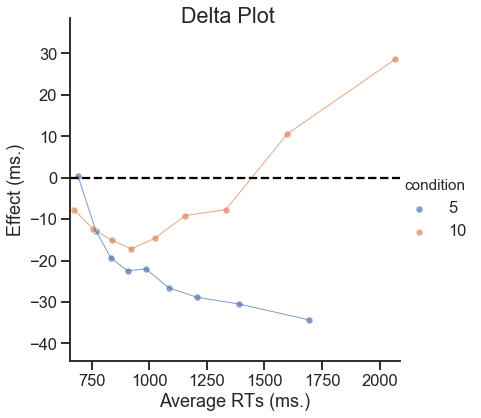

In [127]:
# Calculate delta plot data and plot it
d_data5 = calc_delta_data(df[(df.correct==1) & (df.dsd == 5)], "subjectId", "rt", "Group", ['ASD','TD'])
d_data5['condition']=5
d_data10 = calc_delta_data(df[(df.correct==1) & (df.dsd == 10)], "subjectId", "rt", "Group", ['ASD','TD'])
d_data10['condition']=10

d_data = pd.concat([d_data5, d_data10])
delta_plot(d_data, group='condition')

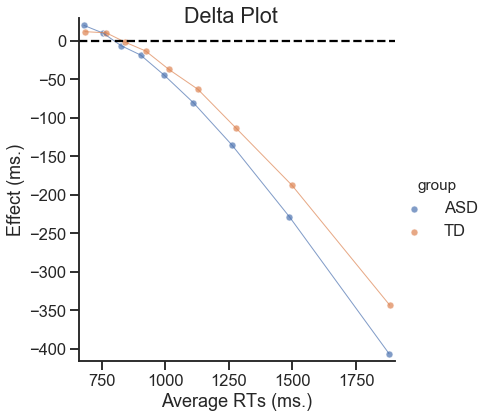

In [128]:
# Calculate delta plot data and plot it
d_dataASD = calc_delta_data(df[(df.correct==1) & (df.Group == 'ASD')], "subjectId", "rt", "dsd", [5,10])
d_dataASD['group']='ASD'
d_dataTD = calc_delta_data(df[(df.correct==1) & (df.Group == 'TD')], "subjectId", "rt", "dsd", [5,10])
d_dataTD['group']='TD'
d_data = pd.concat([d_dataASD, d_dataTD])

delta_plot(d_data, group='group')

Could we model these kinds of plots with DN? If so, can we discriminate whether this is the effect of a difference in the suppression weight or the suppressive pool (or a particular combination of both)?

# Repetition effect

...

# Role-reversal effect

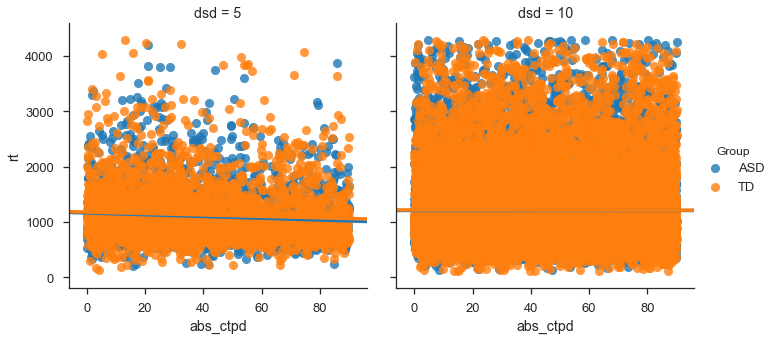

In [163]:

dfsum1 = df.groupby(['subjectId', 'dsd', 'Group', 'abs_ctpd_z']).mean().reset_index()

sns.lmplot(x="abs_ctpd", y="rt", hue="Group",
           col="dsd", data=dfsum1);

In [164]:
results = smf.ols('rt ~ abs_ctpd_z + abs_ctpd_z:Group + Group * SRS_TOTAAL', data=dfsum1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 05 Aug 2019   Prob (F-statistic):          7.45e-139
Time:                        17:29:58   Log-Likelihood:            -2.5679e+05
No. Observations:               32680   AIC:                         5.136e+05
Df Residuals:                   32674   BIC:                         5.136e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1815

In [71]:
%%R

RTmeans_condition <- df_filter %>%
  filter(correct==1) %>% #only for correct responses
  group_by(subjectId,dtype,dsd,group) %>%
  summarise(mean_rt=mean(rt),sd_rt=sd(rt), mean_log_rt = mean(log_rt), sd_log_rt=sd(log_rt))

accmeans_condition<- df_filter %>%
  group_by(group,subjectId,dtype,dsd) %>%
  summarise(mean_acc=mean(correct),sd_acc=sd(correct))

means_condition <- RTmeans_condition%>%right_join(accmeans_condition, by=c("group","subjectId","dtype","dsd")) #RT and accuracy together

#summary table per group per condition
means_condition %>%
  group_by(group,dsd) %>%
  summarise(count = n(),acc=mean(mean_acc), sd_acc = sd(mean_acc), rt = mean(mean_rt), sd_rt=sd(mean_rt))

#Summary table per condition
means_condition %>%
  group_by(dsd) %>%
  summarise(count = n(),acc=mean(mean_acc), sd_acc = sd(mean_acc), rt = mean(mean_rt), sd_rt=sd(mean_rt))


# A tibble: 2 x 6
    dsd count   acc sd_acc    rt sd_rt
  <dbl> <int> <dbl>  <dbl> <dbl> <dbl>
1     5    48 0.933 0.0468 1111.  195.
2    10    48 0.884 0.0608 1215.  190.


In [73]:
%%R

##linear mixed model with DV = RT, IV within = dsd
lmer_rt<-lmer(log_rt ~ dsd * group + (dsd|subjectId), REML=F,  data = df_filter)
summary(lmer_rt)


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: log_rt ~ dsd * group + (dsd | subjectId)
   Data: df_filter

     AIC      BIC   logLik deviance df.resid 
 52051.7  52121.1 -26017.9  52035.7    42798 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6317 -0.6887 -0.1398  0.5994  3.8713 

Random effects:
 Groups    Name        Variance  Std.Dev. Corr 
 subjectId (Intercept) 0.0308365 0.17560       
           dsd         0.0001539 0.01241  -0.54
 Residual              0.1961327 0.44287       
Number of obs: 42806, groups:  subjectId, 48

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  6.837816   0.039081 47.358279 174.963  < 2e-16 ***
dsd          0.014099   0.002987 47.458136   4.721 2.11e-05 ***
groupTD      0.031598   0.054218 47.579356   0.583    0.563    
dsd:groupTD -0.002038   0.004148 47.867005  -0.491    0.625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 